# **Installing the packages**

In [ ]:
! pip install pandas scikit-learn plotly matplotlib wordcloud

# **Importing libraries**

In [ ]:
# Mount the drive if not mounted
from google.colab import drive
drive.mount("/content/drive/")

from collections import Counter

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **Loading Data**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AA-Tutorial/data/Agora.csv", encoding='ISO-8859-1')

In [ ]:
df

,Vendor,Category,Item,Item Description,Price,Origin,Destination,Rating,Remarks
0,CheapPayTV,Services/Hacking,12 Month HuluPlus gift Code,12-Month HuluPlus Codes for $25. They are wort...,0.05027025666666667 BTC,Torland,NaN,4.96/5,NaN
1,CheapPayTV,Services/Hacking,Pay TV Sky UK Sky Germany HD TV and much mor...,Hi we offer a World Wide CCcam Service for En...,0.152419585 BTC,Torland,NaN,4.96/5,NaN
2,KryptykOG,Services/Hacking,OFFICIAL Account Creator Extreme 4.2,Tagged Submission Fix Bebo Submission Fix Adju...,0.007000000000000005 BTC,Torland,NaN,4.93/5,NaN
3,cyberzen,Services/Hacking,VPN > TOR > SOCK TUTORIAL,How to setup a VPN > TOR > SOCK super safe enc...,0.019016783532494728 BTC,NaN,NaN,4.89/5,NaN
4,businessdude,Services/Hacking,Facebook hacking guide,. This guide will teach you how to hack Faceb...,0.062018073963963936 BTC,Torland,NaN,4.88/5,NaN
...,...,...,...,...,...,...,...,...,...
109684,gonz324,Drugs/Opioids/Opium,1 gr purified Opium,This Listing is for a gramm of redefined Opium...,0.14363729 BTC,Germany,NaN,4.91/5,NaN
109685,cheqdropz,Weapons/Fireworks,Shipping Ticket,in order for me to ship one of the guns you bo...,0.08680555 BTC,USA,NaN,[0 deals],NaN
109686,SnowQueen,Drugs/Opioids/Opium,0.50 GRAMS #4 White Afghani Heroin - FULL ESCROW,0.50 grams #4 White Afghani Heroin SnowQueen...,0.33641201 BTC,Canada,Worldwide,[0 deals],NaN
109687,SnowQueen,Drugs/Opioids/Opium,1.0 GRAMS #4 White Afghani Heroin - FULL ESCROW,1.0 grams #4 White Afghani Heroin SnowQueen ...,0.61165820 BTC,Canada,Worldwide,[0 deals],NaN


In [ ]:
# Printing all the features of the dataframe
df = df.rename(str.strip, axis='columns')
df.columns

Index(['Vendor', 'Category', 'Item', 'Item Description', 'Price', 'Origin',
       'Destination', 'Rating', 'Remarks', 'Category 1', 'Category 2',
       'Category 3', 'Category 4'],
      dtype='object')

# **Visualizing Data**

In [ ]:
def generate_freq_distribution(df, column_name):
    """
    This function takes a DataFrame and a column name as inputs and generates a bar plot of the normalized frequency distribution of the values in the specified column using Plotly.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the data.
    - column_name (str): The name of the column to analyze for value frequencies.

    The function calculates the normalized frequencies, converts them to a DataFrame, and then plots them in a bar chart. The title of the chart includes the total number of unique entries in the column.
    """

    # Calculate the normalized frequency of the specified column
    # and count the number of unique entries
    freq = df[column_name].value_counts(normalize=True)
    nr_entries = df[column_name].nunique()

    # Convert the frequency Series to a DataFrame for plotting
    # Setting the column names to the name of the analyzed column and 'frequency'
    freq_df = freq.reset_index()
    freq_df.columns = [column_name, 'frequency']

    # Create the plot using Plotly Express
    # The x-axis represents the unique values in the column
    # The y-axis represents the normalized frequency of each value
    # The plot includes a title that states the total number of unique entries
    fig = px.bar(freq_df, x=column_name, y='frequency',
                 labels={'frequency': 'Normalized Frequency'},
                 title=f'Total number of Entries: {nr_entries}')
    # Display the plot in the output
    fig.show()

Visualizing the product categories in the dataset:

In [ ]:
# Split the 'Category' column into separate 'Category 1', 'Category 2', 'Category 3', 'Category 4' columns
# The split is based on '/', and we're assuming there could be up to 4 categories.
# Entries that do not have 4 categories will have NaN filled for the missing categories.

# Split the 'Category' column into a list of categories
category_split = df['Category'].str.split('/', expand=True)

# Create new columns for each category
df['Category 1'] = category_split[0]
df['Category 2'] = category_split[1]
df['Category 3'] = category_split[2]
df['Category 4'] = category_split[3]

generate_freq_distribution(df, 'Category 2')

Visualizing the origin (shipping) countries:

In [ ]:
generate_freq_distribution(df, 'Origin')

Visualizing the destination countries:

In [ ]:
generate_freq_distribution(df, 'Destination')

Visualizing Vendor Freq

In [ ]:
generate_freq_distribution(df, 'Vendor')

Visualizing Text Length

In [ ]:
# Merging the Item and Item Description using a [SEP] token
separator = ' [SEP] '
df['TEXT'] = df.apply(lambda row: f"{row['Item']}{separator}{row['Item Description']}", axis=1)

In [ ]:
df.TEXT[0]

'12 Month HuluPlus gift Code [SEP] 12-Month HuluPlus Codes for $25. They are worth $95. They will be sent to you within 1 day. Most within a hour or two'

In [ ]:
# Calculating the sentence length by splitting tokens by ' '
df['SENT_LEN'] = df['TEXT'].apply(lambda x: len(x.split(" ")))

In [ ]:
# Visualizing sentence length
fig = px.violin(df, y="SENT_LEN", box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )
fig.show()

Visualizing Frequency distribution of words

In [ ]:
# Function to extract n-grams from text
def extract_ngrams(data, n):
    """
    Extracts n-grams from the input text data.

    Parameters:
    - data: list of strings (text data from the DataFrame).
    - n: number of words in each n-gram.

    Returns:
    - A list of n-grams.
    """
    count_vectorizer = CountVectorizer(ngram_range=(n, n))
    ngrams = count_vectorizer.fit_transform(data)
    ngram_features = count_vectorizer.get_feature_names_out()
    return [" ".join(ngram.split()) for ngram in ngram_features]

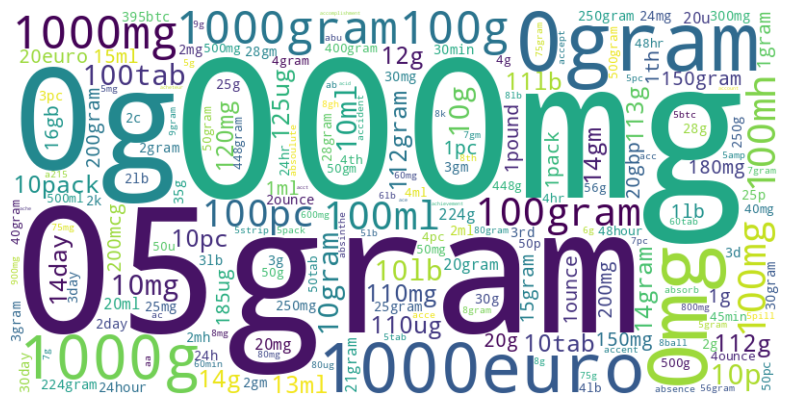

In [ ]:
# Visualizing Unigrams
ngrams = extract_ngrams(df['TEXT'], 1)

# Generate a word cloud for the n-grams
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(" ".join(ngrams))

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes to keep it clean
plt.show()

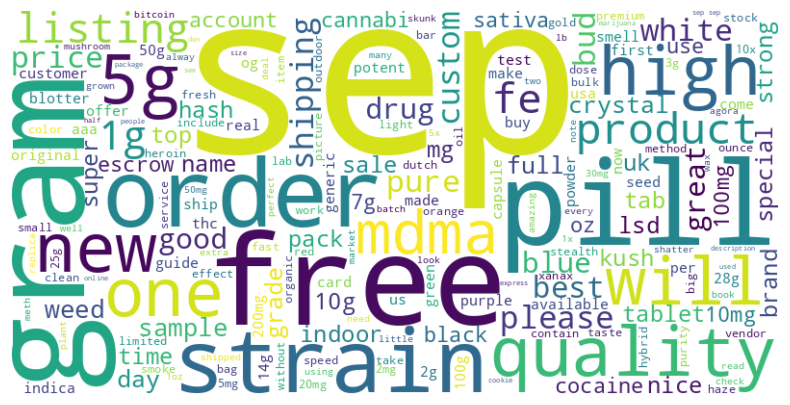

In [ ]:
# Visualizing Bigrams
ngrams = extract_ngrams(df['TEXT'], 2)

# Generate a word cloud for the n-grams
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(" ".join(ngrams))

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes to keep it clean
plt.show()

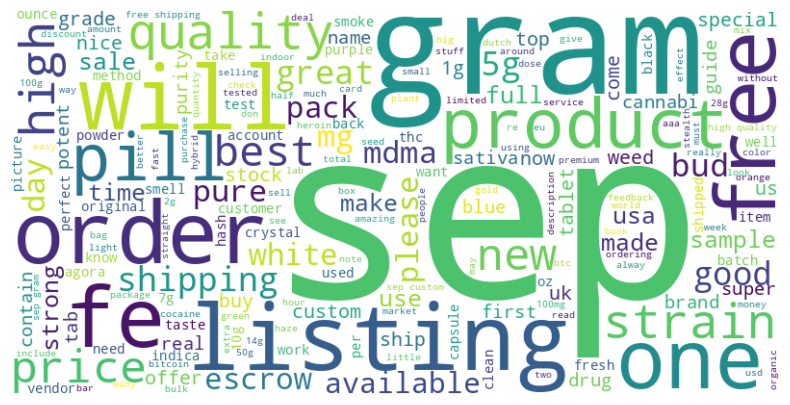

In [ ]:
# Visualizing Trigrams
ngrams = extract_ngrams(df['TEXT'], 3)

# Generate a word cloud for the n-grams
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(" ".join(ngrams))

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes to keep it clean
plt.show()